In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Asus/ML Course/Scikit Learn/heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## As we can see there are no ouutliers and no null values.

In [6]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

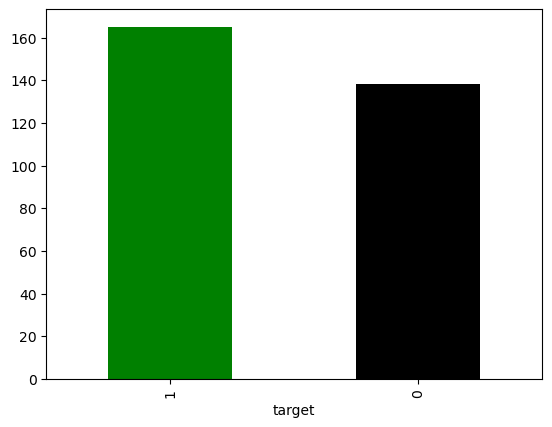

In [7]:
df.target.value_counts().plot.bar(color=["green","black"]);

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

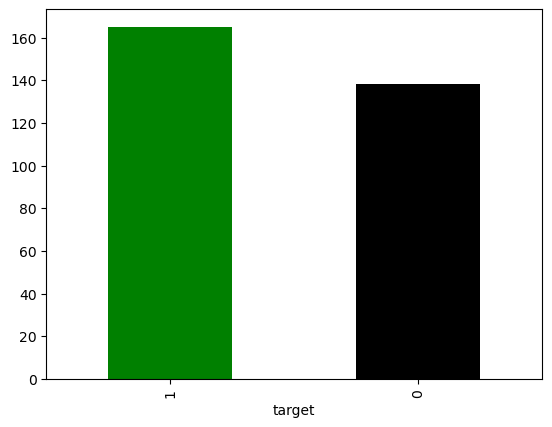

In [9]:
df.target.value_counts().plot(kind="bar",color=["green","black"]);

In [10]:
pd.crosstab(index=df.target,columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


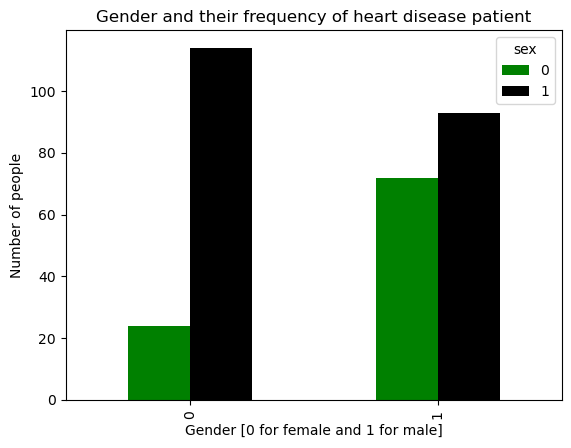

In [11]:
pd.crosstab(df.target,df.sex).plot.bar(color=["green","black"])
plt.xlabel("Gender [0 for female and 1 for male]")
plt.ylabel("Number of people")
plt.title("Gender and their frequency of heart disease patient");

## Comparing age and maximum heart rate

Because there are so many different values for age and thalach, we'll use a scatter plot.
Thalach stands for maximum heart rate achieved during a stress test.

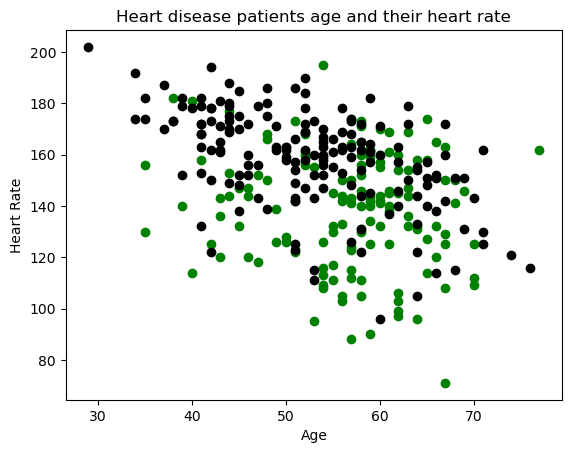

In [12]:
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color=["green"])
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color=["black"])
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Heart disease patients age and their heart rate");

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and it seems there may be more heart disease in the younger population too (more black dots).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

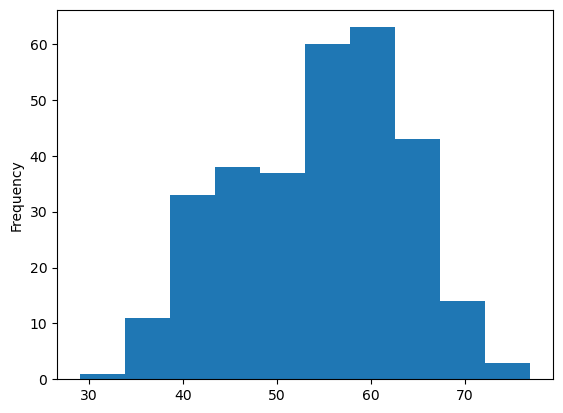

In [13]:
df.age.plot.hist();

## Comparing heart disease frequency and chest pain type
Let's try comparing another independent variable with our target variable.

This time, we'll use cp (chest pain) as the independent variable.

0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)

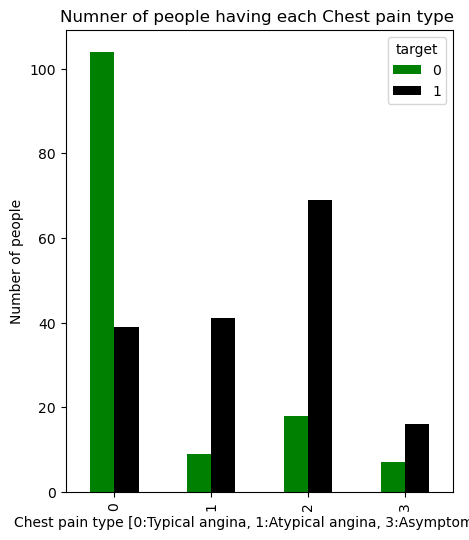

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=[5,6],color=["green","black"])
plt.xlabel("Chest pain type [0:Typical angina, 1:Atypical angina, 3:Asymptomatic]")
plt.ylabel("Number of people")
plt.title("Numner of people having each Chest pain type ");

## Correlation between independent variables

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


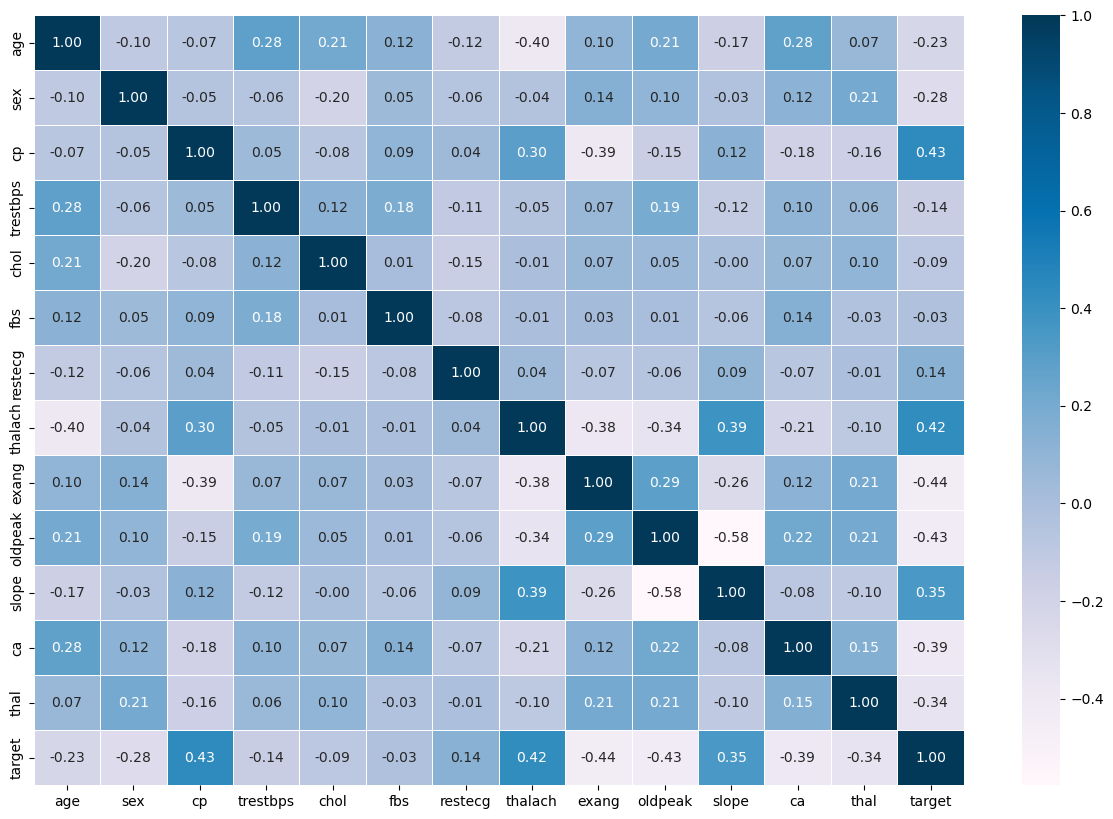

In [16]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap="PuBu",fmt= ".2f");


 A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

# Enough EDA now Modeling

In [17]:
import pandas as pd

# Assuming 'df' is your DataFrame
df = df.sample(frac=1, random_state=42)  # Set random_state for reproducibility


In [18]:
def model_score_evaluater(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_and_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_and_scores[name]=model.score(X_test,y_test)
    return model_and_scores

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [20]:
X=df.drop(["target"],axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [21]:
y=df["target"]
y

179    0
228    0
111    1
246    0
60     1
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 303, dtype: int64

In [22]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### To select a model we have

<img src="model selection.png" alt="Sample Image" width="800" height="500"/>

As we have to do classification so first we'll go in classification and as our dataset is small and have very less data so we'll fo toward Linear SVC but it is not that good and our data is not text data so we'll try to attempt `Logistic Regression`, `KNN Classifiaction` and from ensemble we'll go for `Random Forest Classiifer` also we we'll go for `SVM`.

In [23]:
# Importing different Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression":LogisticRegression(solver='newton-cg', max_iter=200),
          "Random Forest": RandomForestClassifier(),
          "Support Vector Macine":SVC()}

In [25]:
model_scores=model_score_evaluater(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.5901639344262295,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.7868852459016393,
 'Support Vector Macine': 0.5737704918032787}

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model_scores_scaled=model_score_evaluater(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)
model_scores_scaled

{'KNN': 0.819672131147541,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.7868852459016393,
 'Support Vector Macine': 0.819672131147541}

We can visualize the score

In [28]:
model_compare=pd.DataFrame(model_scores_scaled,index=["accuracy"])
model_compare

,KNN,Logistic Regression,Random Forest,Support Vector Macine
accuracy,0.819672,0.852459,0.786885,0.819672


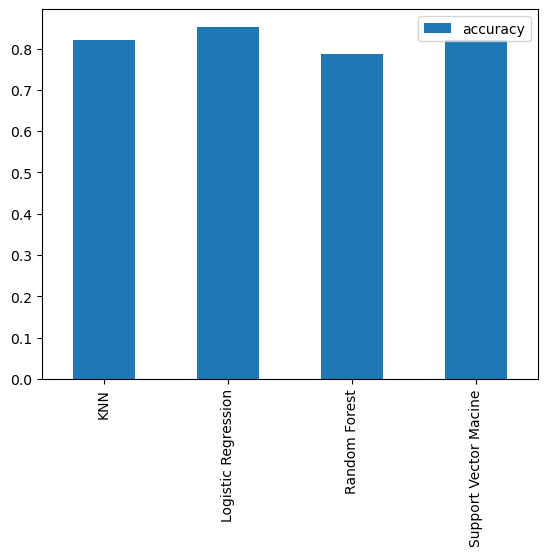

In [29]:
model_compare.T.plot(kind="bar");

We got very good score but can we increase yes by 
`Hyperparameter Tuning` and by `cross validation`

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score_knn=cross_val_score(KNeighborsClassifier(),X_train_scaled,y_train,cv=5)
cross_val_score_knn

array([0.83673469, 0.85714286, 0.77083333, 0.85416667, 0.83333333])

In [31]:
import numpy as np
mean_score = np.mean(cross_val_score_knn)
print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.8304421768707483


### Now we we'll try to find best paramters by gridsearchcv

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd

def find_best_model(X, y, cv): 
    model_params = {
        "RandomForestClassifier": {
            "model": RandomForestClassifier(random_state=42),
            "params": {
                "n_estimators": [100],  # Keep only one option
                "max_depth": [None, 10],  # Reduce options
                "min_samples_split": [2, 5],  # Reduce options
            }
        },
        "SVM": {
            "model": SVC(),
            "params": {
                "C": [1, 10],  # Reduce options
                "kernel": ['linear', 'rbf'],  # Reduce options
            }
        },
        "Logistic Regression": {
            "model": LogisticRegression(),
            "params": {
                "C": [1, 10],  # Reduce options
                "solver": ['lbfgs'],  # Keep one option
            }
        },
        "KNN": {
            "model": KNeighborsClassifier(),
            "params": {
                "n_neighbors": [5],  # Keep one option
                "weights": ['uniform'],  # Keep one option
            }
        }
    }
    
    scores = []
    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp["model"], mp["params"], cv=cv, return_train_score=False)
        clf.fit(X, y)  # Use X and y for fitting
        
        scores.append({
            "model": model_name,
            "best_parameters": clf.best_params_,
            "best_cv_score": clf.best_score_
        })
        
    df_scores = pd.DataFrame(scores, columns=['model', 'best_parameters', 'best_cv_score'])
    return df_scores

# Assuming X and y are defined in your context
result = find_best_model(X, y, 5)
result


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,model,best_parameters,best_cv_score
0,RandomForestClassifier,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.811858
1,SVM,"{'C': 10, 'kernel': 'linear'}",0.828306
2,Logistic Regression,"{'C': 1, 'solver': 'lbfgs'}",0.828361
3,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.659891


In [33]:
SVM	=LogisticRegression(C= 1, solver='lbfgs')
SVM.fit(X_train,y_train)
SVM.score(X_test,y_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688524590163934

In [34]:
y_preds=SVM.predict(X_test)
y_preds[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [35]:
y_test[:10]

222    0
153    1
230    0
201    0
184    0
33     1
253    0
156    1
166    0
42     1
Name: target, dtype: int64

## Evaluating a classification model, beyond accuracy

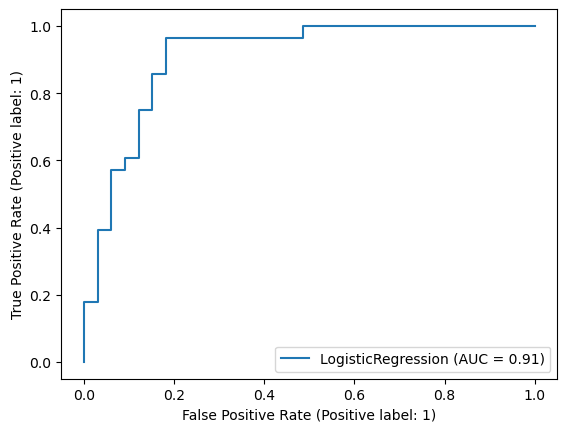

In [36]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=SVM, 
                               X=X_test, 
                               y=y_test); 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[26  7]
 [ 1 27]]


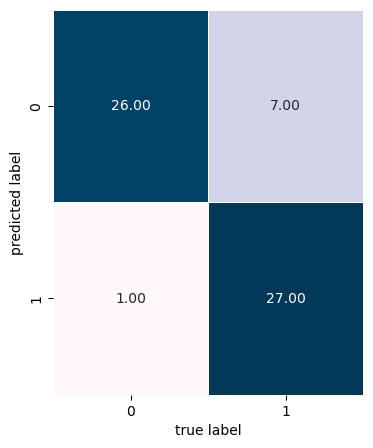

In [39]:
def cm(y_test,y_preds):
    plt.figure(figsize=[4,5])
    sns.heatmap(confusion_matrix(y_test,y_preds),annot=True, linewidths=0.5,cmap="PuBu",fmt= ".2f",cbar=False);
    plt.xlabel("true label")
    plt.ylabel("predicted label")
cm(y_test=y_test,y_preds=y_preds)

In [40]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C= 1, solver='lbfgs')
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.86885246, 0.81967213, 0.80327869, 0.78333333, 0.86666667])

In [41]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8283606557377048

In [42]:
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8504419533799765

In [43]:
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8909090909090909

In [44]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8150540150540151

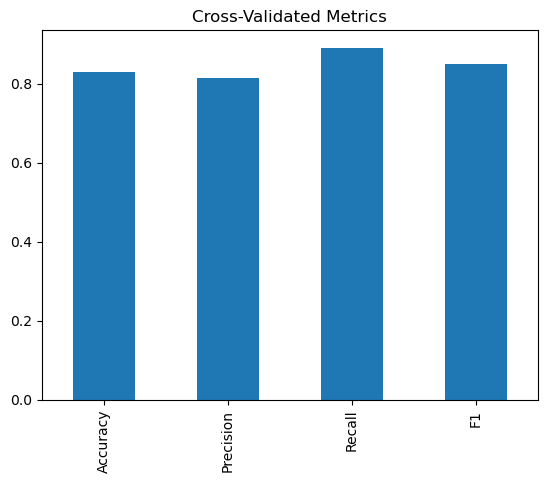

In [45]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [46]:
clf.fit(X_train, y_train);
# Check coef_
clf.coef_

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.01350917, -1.01684482,  0.72421883, -0.01356096, -0.00270931,
         0.08304619,  0.61421851,  0.03090841, -0.76805815, -0.565163  ,
         0.46421795, -0.67641037, -1.04730574]])

In [47]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.013509173544893529,
 'sex': -1.016844815049502,
 'cp': 0.7242188317404431,
 'trestbps': -0.013560955232990543,
 'chol': -0.002709305170665685,
 'fbs': 0.08304619261057408,
 'restecg': 0.6142185080034392,
 'thalach': 0.03090841274202008,
 'exang': -0.7680581455333237,
 'oldpeak': -0.5651630011260392,
 'slope': 0.464217954840641,
 'ca': -0.6764103712843049,
 'thal': -1.0473057391308538}

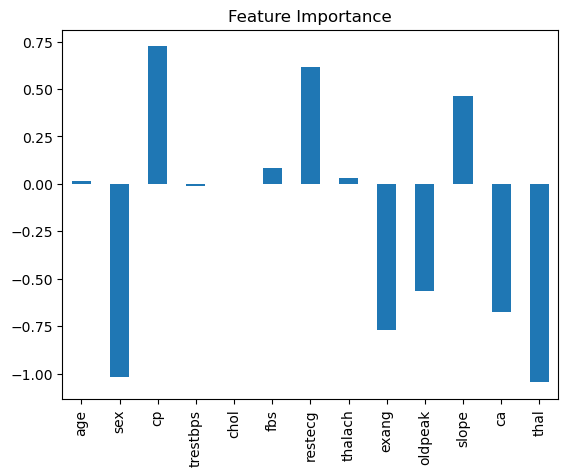

In [48]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);